In [1]:
import numpy as np
from matplotlib import pyplot as plt

/Users/Greta/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [144]:
import environment
import policies
import algorithm
import experimentsV2

# Random Walk experiments

I analyse the bias of $ETD(0,\beta)$ on the 5-states random walk example from the book (with 0 reward everywhere except for the transition to the right terminal state where the reward is 1. 

In [195]:
"""
Dict containing the results of the runs for different values of the decay rate factor. The dict is define based on
values for which the computations is at the bottom of this notebook (takes a lot of place). 
To be sure to have 1 decimal, values of p, we redefine the keys. 
"""
thetas_p_bis = dict()
thetas_p[8] = thetas_p_8
thetas_p[9] = thetas_p_9
thetas_p[5] = thetas_p_5
thetas_p[6] = thetas_p_6

thetas_p_bis = dict()
for j in [5,6,8,9] : 
    cles = thetas_p[j].keys()
    thetas_p_bis[j] = dict()
    for elt in cles : 
        nelt = round(elt,2)
        thetas_p_bis[j][nelt] = thetas_p[j][elt]

The cell below put the results in a matrix

In [199]:

matrix_results = np.zeros((10,11,4))
opt_results = np.zeros((4,11))
valeurs_p = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# ETD fixed point: for each p, get the last value of theta for each run and get the average
for p in valeurs_p : # for each p
    for i in range(10) : # for each run
        for j in [5,6,8,9]: # for each value of beta
            
            d_mu = station_distrib[p]
            f = experimentsV2.getVectorF(d_mu,transitionMatrix,5,1./j)
            D_f = np.diag(np.reshape(f,(5,)))
            Pi_f = experimentsV2.projectionMatrix(featureMatrix_tab,D_f)

            optProj = Pi_f.dot(v_true)
            opt = experimentsV2.computeMSE(optProj,v_true,D_f)
            opt_results[[5,6,8,9].index(j)][valeurs_p.index(p)]
            
            last_theta = thetas_p_bis[j][p][i][-1]
            tv = experimentsV2.TV(last_theta,featureMatrix_tab,transitionMatrix,R,gamma)
            value = Pi_f.dot(tv)
            mse = experimentsV2.computeMSE(value,v_true,D_f)
            
            matrix_results[i][valeurs_p.index(p)][[5,6,8,9].index(j)] = mse

Representation on one graph of the different values of mse

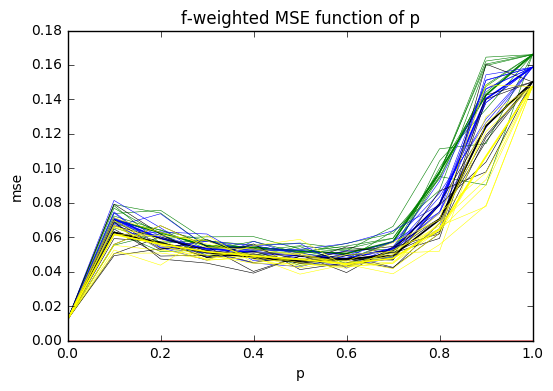

In [212]:
for run in range(10) : 
    valeurs_mse_run = list(matrix_results[run,:,0])
    plt.plot(valeurs_p,valeurs_mse_run,color = 'green',linewidth = 0.4)
plt.plot(valeurs_p,list(opt_results[0,:]),label = 'erreur optimale beta = 0.5',color = 'red',linewidth = 0.9)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,0],axis = 0)),label='average mse beta = 0.5',color = 'green',linewidth = 1.2)

for run in range(10) : 
    valeurs_mse_run = list(matrix_results[run,:,1])
    plt.plot(valeurs_p,valeurs_mse_run,color = 'blue',linewidth = 0.4)
plt.plot(valeurs_p,list(opt_results[1,:]),label = 'erreur optimale beta = 0.5',color = 'red',linewidth = 0.9)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,1],axis = 0)),label='average mse beta = 0.5',color = 'blue',linewidth = 1.2)

for run in range(10) : 
    valeurs_mse_run = list(matrix_results[run,:,2])
    plt.plot(valeurs_p,valeurs_mse_run,color = 'black',linewidth = 0.4)
plt.plot(valeurs_p,list(opt_results[2,:]),label = 'erreur optimale beta = 0.5',color = 'red',linewidth = 0.9)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,2],axis = 0)),label='average mse beta = 0.5',color = 'black',linewidth = 1.2)

for run in range(10) : 
    valeurs_mse_run = list(matrix_results[run,:,3])
    plt.plot(valeurs_p,valeurs_mse_run,color = 'yellow',linewidth = 0.4)
plt.plot(valeurs_p,list(opt_results[3,:]),label = 'erreur optimale beta = 0.5',color = 'red',linewidth = 0.9)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,3],axis = 0)),label='average mse beta = 0.5',color = 'yellow',linewidth = 1.2)


plt.title('f-weighted MSE function of p')
plt.xlabel('p')
plt.ylabel('mse')
plt.show()

This graph represents the f-weighted norm MSPBE projected with the PI_f matrix for different values of the dacay rate factor and several runs. 
The value of the decay rate factor does not seem to have a significan impact of the performance. The shape of the curves is the same for all. However, the mse seems globally be decreasing with the decay rate increasing. We can notice this especially for the value p = 1.0

# Get the mse (TD) for different behavior policies

In [214]:
actions = ['left','right']
proba_pi = [0.5,0.5]
featureMatrix_tab = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
transitionMatrix = np.array([[0.,0.5,0.,0.,0.],[0.5,0.,0.5,0,0],[0,0.5,0.,0.5,0.],[0.,0.,0.5,0.,0.5],[0.,0.,0.,0.5,0.]])
R = np.array([0.,0.,0.,0.,0.5])[:,None]
print R
alpha = 0.005
gamma = 0.9
maxSteps = 2000
environment_rw5 = environment.randomWalk(5,featureMatrix_tab)
v_true = np.array([1/6.,2/6.,3/6.,4/6.,5/6.])[:,None]
D_pi = np.diag(np.array([0.126,0.207,0.3334,0.207,0.126]))
projMatrix_pi = experimentsV2.projectionMatrix(featureMatrix_tab,D_pi)

[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.5]]


In [215]:
thetas_p_td = experimentsV2.getMSE_allP_oneBeta(actions,proba_pi,alpha,gamma,environment_rw5,0,'c',maxSteps,True,'TD',1)

p  0.0  being done
	 run 0 being done
p  0.1  being done
	 run 0 being done
p  0.2  being done
	 run 0 being done
p  0.3  being done
	 run 0 being done
p  0.4  being done
	 run 0 being done
p  0.5  being done
	 run 0 being done
p  0.6  being done
	 run 0 being done
p  0.7  being done
	 run 0 being done
p  0.8  being done
	 run 0 being done
p  0.9  being done
	 run 0 being done
p  1.0  being done
	 run 0 being done


In [221]:
mse_td = []
for p in valeurs_p : # for each p
    d_mu = station_distrib[p]
    D_mu = np.diag(d_mu)
    last_theta = thetas_p_td[p][0][-1]
    tv = experimentsV2.TV(last_theta,featureMatrix_tab,transitionMatrix,R,gamma)
    Pi_mu = experimentsV2.projectionMatrix(featureMatrix_tab,D_mu)
    value = Pi_mu.dot(tv)
    mse = experimentsV2.computeMSE(value,v_true,D_mu)
    mse_td.append(float(mse))

Average values of the f-weighted MSPBSE for different values of the decay rate factor and the d_mu weighted are gathered in the graph below

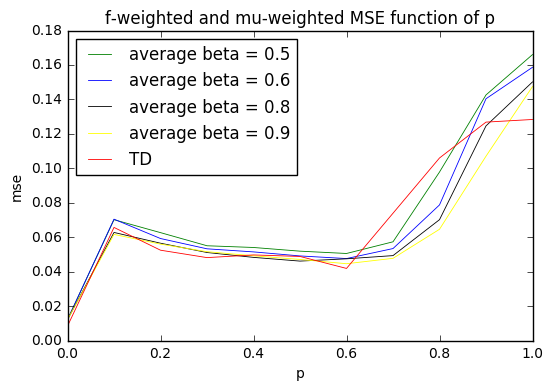

In [225]:
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,0],axis = 0)),label='average beta = 0.5',color = 'green',linewidth = 0.6)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,1],axis = 0)),label='average beta = 0.6',color = 'blue',linewidth = 0.6)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,2],axis = 0)),label='average beta = 0.8',color = 'black',linewidth = 0.6)
plt.plot(valeurs_p,list(np.mean(matrix_results[:,:,3],axis = 0)),label='average beta = 0.9',color = 'yellow',linewidth = 0.6)
plt.plot(valeurs_p,mse_td,label='TD',linewidth = 0.6,color = 'red')

plt.title('f-weighted and mu-weighted MSPBE function of p')
plt.xlabel('p')
plt.ylabel('mse')
plt.legend(loc = 'upper left')
plt.show()

# Error (ETD) function of the decay rate 

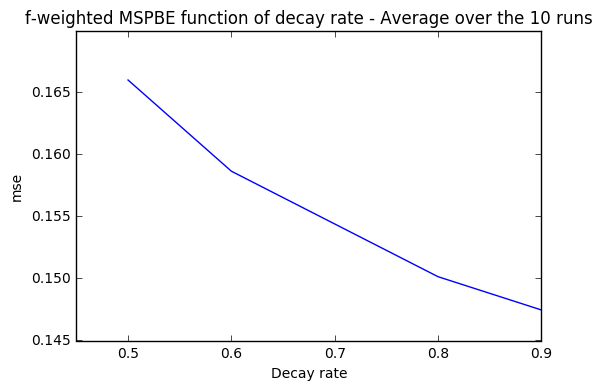

In [229]:
#p = 0.9 ie indice 10 dans la matrice
valeurs_beta = [0.5,0.6,0.8,0.9]
mse_beta = [float(np.mean(matrix_results[:,:,0],axis = 0)[10]),
            float(np.mean(matrix_results[:,:,1],axis = 0)[10]),
            float(np.mean(matrix_results[:,:,2],axis = 0)[10]),
            float(np.mean(matrix_results[:,:,3],axis = 0)[10])]
plt.plot(valeurs_beta,mse_beta)
plt.xlabel('Decay rate')
plt.ylabel('mse')
plt.title('f-weighted MSPBE function of decay rate - Average over the 10 runs')
plt.show()

The MSE is decreasing with the decay rate factor. Then, in some cases, it is the best option the have the decay rate factor equal to the discount factor, when the latter tends towards 1. 

# Stationary distribution

The computations below were to find an experimental value of the stationary distribution, for the target policy and the behavior policy. I needed them for the projection matrix used in the computations of the MSPBE.

In [26]:
for p in list(np.arange(0.,1.1,0.1)) : 
    print 'p = ',p
    print experimentsV2.getStationarydistribution(p,3000)

p =  0.0
[0.0, 0.0, 0.3333333333333479, 0.3333333333333479, 0.3333333333333479]
p =  0.1
[0.0017176527176527173, 0.022369467569467682, 0.3348511118511223, 0.3321930587930687, 0.30886870906871977]
p =  0.2
[0.009694101025181909, 0.049575463188143376, 0.33289773476948914, 0.3252003534103755, 0.28263234760683165]
p =  0.3
[0.029405237970933376, 0.08939135323859272, 0.33194150977349346, 0.30502969758322107, 0.24423220143377114]
p =  0.4
[0.06980130763437731, 0.14203309509608394, 0.33252121445525984, 0.2647699449529137, 0.19087443786136934]
p =  0.5
[0.12765246675226458, 0.20729744706213382, 0.3316810663379096, 0.20644536504940456, 0.12692365479828804]
p =  0.6
[0.1917579975681724, 0.2665096338787828, 0.3341231924930148, 0.1407188228040034, 0.0668903532560321]
p =  0.7
[0.24155432485737272, 0.30260961400357633, 0.3324885990035779, 0.09163667721085791, 0.031710784924627027]
p =  0.8
[0.2815634830244122, 0.3248377542859249, 0.33399562762261154, 0.049527524175121566, 0.010075610891952235]
p = 

In [110]:
station_distrib = dict()
station_distrib[0.] = [0.0, 0.0, 0.33, 0.33, 0.33]
station_distrib[0.1] = [0.00, 0.02, 0.33, 0.33, 0.31]
station_distrib[0.2] = [0.001, 0.05, 0.33, 0.325, 0.28]
station_distrib[0.3] = [0.029, 0.089, 0.33, 0.30, 0.24]
station_distrib[0.4] = [0.069, 0.14, 0.33, 0.26, 0.19]
station_distrib[0.5] = [0.127, 0.20, 0.33, 0.20, 0.127]
station_distrib[0.6] = [0.191, 0.27, 0.33, 0.14, 0.067]
station_distrib[0.7] = [0.241, 0.30, 0.33, 0.09, 0.031]
station_distrib[0.8] = [0.281, 0.32, 0.33, 0.05, 0.01]
station_distrib[0.9] = [0.309, 0.33, 0.33, 0.023, 0.002]
station_distrib[1.0] = [0.33, 0.33, 0.33, 0.0, 0.0]

# Find an adequate learning rate

I used the graphs below to get a good enough value for the learning rate as a trade-off between running time (several runs take some time computing) and convergence. 

In [104]:
thetas001,mses_pi001,mses_f001,mses_mu001 = experimentsV2.several_alpha(0.001)
thetas005,mses_pi005,mses_f005,mses_mu005 = experimentsV2.several_alpha(0.005)
thetas01,mses_pi01,mses_f01,mses_mu01 = experimentsV2.several_alpha(0.01)

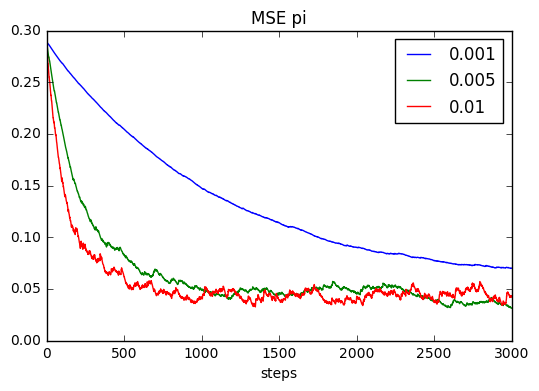

In [107]:
plt.plot(range(3000),mses_pi001,label = '0.001')
plt.plot(range(3000),mses_pi005,label = '0.005')
plt.plot(range(3000),mses_pi01,label = '0.01')
plt.title('MSE pi')
plt.xlabel('steps')
plt.legend()
plt.show()

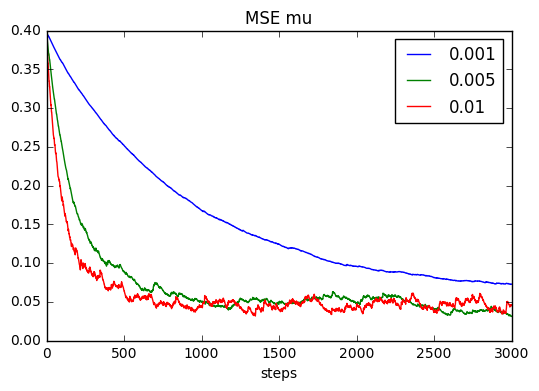

In [108]:
plt.plot(range(3000),mses_mu001,label = '0.001')
plt.plot(range(3000),mses_mu005,label = '0.005')
plt.plot(range(3000),mses_mu01,label = '0.01')
plt.title('MSE mu')
plt.xlabel('steps')
plt.legend()
plt.show()

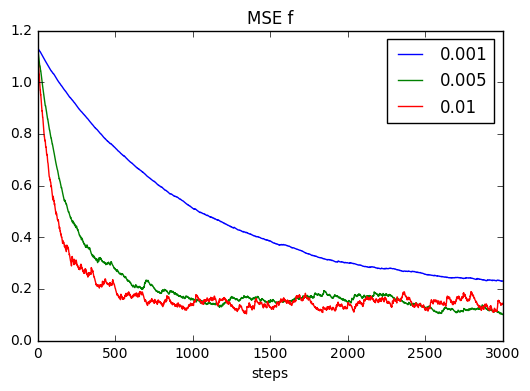

In [109]:
plt.plot(range(3000),mses_f001,label = '0.001')
plt.plot(range(3000),mses_f005,label = '0.005')
plt.plot(range(3000),mses_f01,label = '0.01')
plt.title('MSE f')
plt.xlabel('steps')
plt.legend()
plt.show()

# Computations to get the mse (ETD) for different behavior policies and decay rate

The lines below are not much of interest. It was just to follow the computations and know the p/run being calculated.

In [155]:
beta8 = 0.8
thetas_p_8 = experimentsV2.getMSE_allP_oneBeta(actions,proba_pi,alpha,gamma,environment_rw5,beta8,'c',maxSteps,True,'ETD0',10)

p  0.0  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.1  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.2  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.3  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.4  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 bein

In [157]:
beta9 = 0.9
thetas_p_9 = experimentsV2.getMSE_allP_oneBeta(actions,proba_pi,alpha,gamma,environment_rw5,beta9,'c',maxSteps,True,'ETD0',10)

p  0.0  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.1  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.2  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.3  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.4  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 bein

In [160]:
beta6 = 0.6
thetas_p_6 = experimentsV2.getMSE_allP_oneBeta(actions,proba_pi,alpha,gamma,environment_rw5,beta6,'c',maxSteps,True,'ETD0',10)

p  0.0  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.1  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.2  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.3  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.4  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 bein

In [158]:
beta5 = 0.5
thetas_p_5 = experimentsV2.getMSE_allP_oneBeta(actions,proba_pi,alpha,gamma,environment_rw5,beta5,'c',maxSteps,True,'ETD0',10)

p  0.0  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.1  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.2  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.3  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 being done
	 run 8 being done
	 run 9 being done
p  0.4  being done
	 run 0 being done
	 run 1 being done
	 run 2 being done
	 run 3 being done
	 run 4 being done
	 run 5 being done
	 run 6 being done
	 run 7 bein